# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your interests.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images


Done extracting features for 2000 / 49000 images


Done extracting features for 3000 / 49000 images


Done extracting features for 4000 / 49000 images


Done extracting features for 5000 / 49000 images


Done extracting features for 6000 / 49000 images


Done extracting features for 7000 / 49000 images


Done extracting features for 8000 / 49000 images


Done extracting features for 9000 / 49000 images


Done extracting features for 10000 / 49000 images


Done extracting features for 11000 / 49000 images


Done extracting features for 12000 / 49000 images


Done extracting features for 13000 / 49000 images


Done extracting features for 14000 / 49000 images


Done extracting features for 15000 / 49000 images


Done extracting features for 16000 / 49000 images


Done extracting features for 17000 / 49000 images


Done extracting features for 18000 / 49000 images


Done extracting features for 19000 / 49000 images


Done extracting features for 20000 / 49000 images


Done extracting features for 21000 / 49000 images


Done extracting features for 22000 / 49000 images


Done extracting features for 23000 / 49000 images


Done extracting features for 24000 / 49000 images


Done extracting features for 25000 / 49000 images


Done extracting features for 26000 / 49000 images


Done extracting features for 27000 / 49000 images


Done extracting features for 28000 / 49000 images


Done extracting features for 29000 / 49000 images


Done extracting features for 30000 / 49000 images


Done extracting features for 31000 / 49000 images


Done extracting features for 32000 / 49000 images


Done extracting features for 33000 / 49000 images


Done extracting features for 34000 / 49000 images


Done extracting features for 35000 / 49000 images


Done extracting features for 36000 / 49000 images


Done extracting features for 37000 / 49000 images


Done extracting features for 38000 / 49000 images


Done extracting features for 39000 / 49000 images


Done extracting features for 40000 / 49000 images


Done extracting features for 41000 / 49000 images


Done extracting features for 42000 / 49000 images


Done extracting features for 43000 / 49000 images


Done extracting features for 44000 / 49000 images


Done extracting features for 45000 / 49000 images


Done extracting features for 46000 / 49000 images


Done extracting features for 47000 / 49000 images


Done extracting features for 48000 / 49000 images


## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]
regularization_strengths = [5e-2, 5e-1, 5e0, 5e1, 5e2]

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, num_iters=1500, learning_rate=lr, reg=reg)
        y_train_pred = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == y_val_pred)
        if best_val < val_accuracy:
            best_val, best_svm = val_accuracy, svm
        results[lr, reg] = train_accuracy, val_accuracy
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

/Users/Vojta/Source/stanford-cs231n-cnn-for-visual-recognition/assignment1/cs231n/classifiers/linear_svm.py:81: RuntimeWarning: overflow encountered in double_scalars
  loss = np.sum(svm_margins) / num_train + reg * np.sum(W * W)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/Vojta/Source/stanford-cs231n-cnn-for-visual-recognition/assignment1/cs231n/classifiers/linear_svm.py:81: RuntimeWarning: overflow encountered in multiply
  loss = np.sum(svm_margins) / num_train + reg * np.sum(W * W)
/Users/Vojta/Source/stanford-cs231n-cnn-for-visual-recognition/assignment1/cs231n/classifiers/linear_svm.py:99: RuntimeWarning: overflow encountered in multiply
  dW = X.T @ binary / num_train + reg * 2 * W
/Users/Vojta/Source/stanford-cs231n-cnn-for-visual-recognition/assignment1/cs231n/classifiers/linear_svm.py:96: RuntimeWarning: invalid value encountered in greater

/Users/Vojta/Source/stanford-cs231n-cnn-for-visual-recognition/assignment1/cs231n/classifiers/linear_svm.py:78: RuntimeWarning: overflow encountered in subtract
  margins = scores - correct_class_scores[:, None] + 1
/Users/Vojta/Source/stanford-cs231n-cnn-for-visual-recognition/assignment1/cs231n/classifiers/linear_svm.py:78: RuntimeWarning: invalid value encountered in subtract
  margins = scores - correct_class_scores[:, None] + 1


lr 1.000000e-04 reg 5.000000e-02 train accuracy: 0.449918 val accuracy: 0.445000
lr 1.000000e-04 reg 5.000000e-01 train accuracy: 0.448878 val accuracy: 0.442000
lr 1.000000e-04 reg 5.000000e+00 train accuracy: 0.439510 val accuracy: 0.438000
lr 1.000000e-04 reg 5.000000e+01 train accuracy: 0.416531 val accuracy: 0.423000
lr 1.000000e-04 reg 5.000000e+02 train accuracy: 0.414082 val accuracy: 0.407000
lr 1.000000e-03 reg 5.000000e-02 train accuracy: 0.499959 val accuracy: 0.486000
lr 1.000000e-03 reg 5.000000e-01 train accuracy: 0.490857 val accuracy: 0.483000
lr 1.000000e-03 reg 5.000000e+00 train accuracy: 0.449980 val accuracy: 0.452000
lr 1.000000e-03 reg 5.000000e+01 train accuracy: 0.410122 val accuracy: 0.407000
lr 1.000000e-03 reg 5.000000e+02 train accuracy: 0.320694 val accuracy: 0.316000
lr 1.000000e-02 reg 5.000000e-02 train accuracy: 0.506551 val accuracy: 0.503000
lr 1.000000e-02 reg 5.000000e-01 train accuracy: 0.487429 val accuracy: 0.477000
lr 1.000000e-02 reg 5.000000

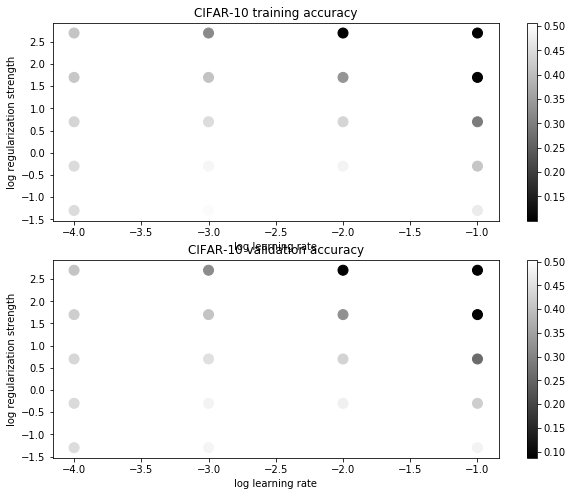

In [5]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [6]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.486


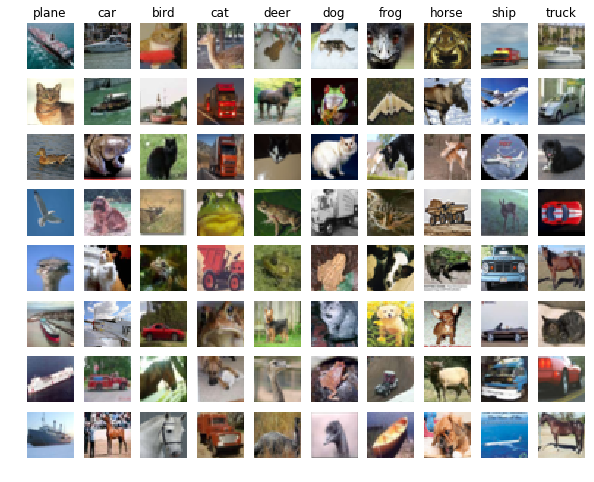

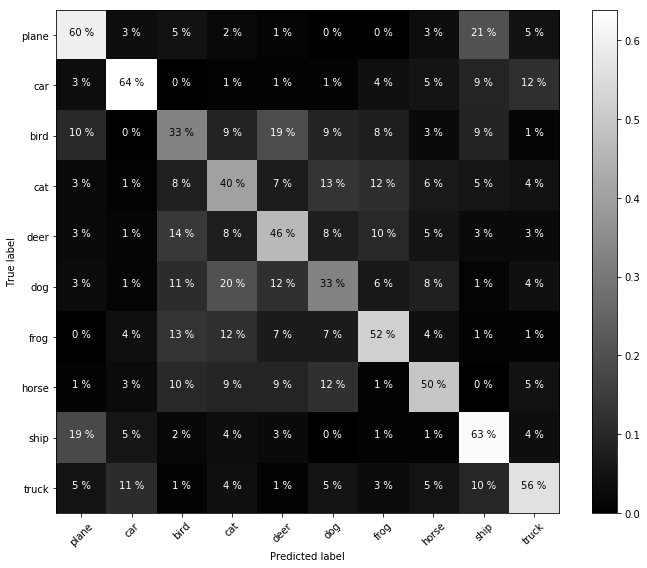

In [7]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".
import itertools 
from sklearn.metrics import confusion_matrix

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

cfm = confusion_matrix(y_val, best_svm.predict(X_val_feats))
cfm = cfm.astype('float') / cfm.sum(axis=1)[:, None]

plt.imshow(cfm, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cfm.shape[0]), range(cfm.shape[1])):
    plt.text(j, i, format(cfm[i, j] * 100, '.0f') + ' %',
             horizontalalignment="center",
             color="white" if cfm[i, j] < 0.3 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

The SVM tends to mis-predict classes with similar backrounds. For example there's about 20% of mis-classified of ships as planes and vice-vers. Second most common mis-classification is between cats and dogs. There's also a block of frequent confusion between different animals - cat, dog, deer, bird, frog and horse.

The difference between these most commonly mis-labeled clsses is mostly in the detailed features and the texture of the animal/object body which is hard for HOG and color histogram features to capture in sufficient detail. Histogram and HOG capture the color pallete of the image and orientation of it's edges rather than the texture and shape of the body.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [8]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


In [9]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
num_classes = 10
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
results = {}
best_val = -1
hidden_sizes = [200, 300, 500, 700, 900, 1100]
regularization_strengths = [0.0, 0.01, 0.10]

for hidden_size in hidden_sizes:
    for reg in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_size, num_classes)
        net.stats = net.train(X_train_feats, y_train, X_val_feats, y_val, reg=reg,
                              num_iters=3000, batch_size=200,
                              learning_rate=1e-1, learning_rate_decay=0.98)
        y_train_pred = net.predict(X_train_feats)
        train_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = net.predict(X_val_feats)
        val_accuracy = np.mean(y_val == y_val_pred)
        if best_val < val_accuracy:
            best_val, best_net = val_accuracy, net
        results[hidden_size, reg] = train_accuracy, val_accuracy
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for hs, reg in sorted(results):
    train_accuracy, val_accuracy = results[(hs, reg)]
    print('hs %f reg %e train accuracy: %f val accuracy: %f' % (
                hs, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

hs 200.000000 reg 0.000000e+00 train accuracy: 0.601694 val accuracy: 0.574000
hs 200.000000 reg 1.000000e-02 train accuracy: 0.526857 val accuracy: 0.511000
hs 200.000000 reg 1.000000e-01 train accuracy: 0.338306 val accuracy: 0.323000
hs 300.000000 reg 0.000000e+00 train accuracy: 0.601122 val accuracy: 0.563000
hs 300.000000 reg 1.000000e-02 train accuracy: 0.525490 val accuracy: 0.521000
hs 300.000000 reg 1.000000e-01 train accuracy: 0.343837 val accuracy: 0.322000
hs 500.000000 reg 0.000000e+00 train accuracy: 0.612633 val accuracy: 0.574000
hs 500.000000 reg 1.000000e-02 train accuracy: 0.523980 val accuracy: 0.512000
hs 500.000000 reg 1.000000e-01 train accuracy: 0.347449 val accuracy: 0.334000
hs 700.000000 reg 0.000000e+00 train accuracy: 0.612265 val accuracy: 0.569000
hs 700.000000 reg 1.000000e-02 train accuracy: 0.527102 val accuracy: 0.498000
hs 700.000000 reg 1.000000e-01 train accuracy: 0.337184 val accuracy: 0.320000
hs 900.000000 reg 0.000000e+00 train accuracy: 0.612

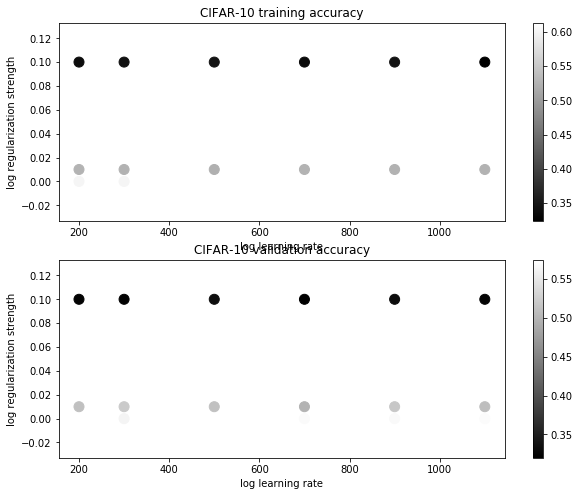

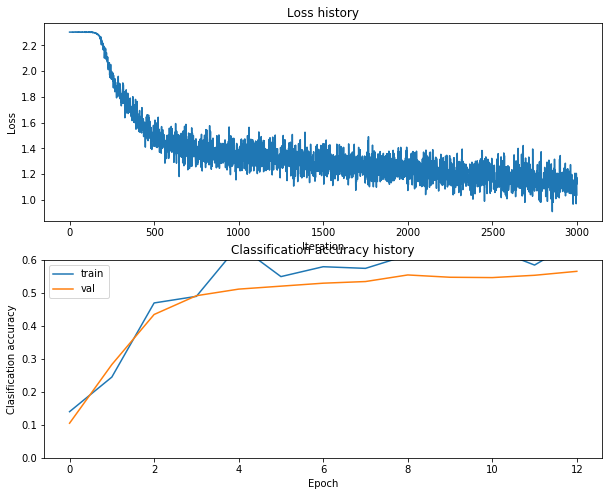

In [10]:
# Visualize the cross-validation results
x_scatter = [x[0] for x in results]
y_scatter = [x[1] for x in results]

# Plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# Plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_net.stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_net.stats['train_acc_history'], label='train')
plt.plot(best_net.stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylim([0, 0.6])
plt.ylabel('Clasification accuracy')

plt.legend()
plt.show()

In [11]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.569
